# 1. Import useful modules and packages

In [1]:
import sys
sys.path.append('/home/decker/lab433')

from synoptic import SFC, yymmddhh, slp_formatter

from datetime import datetime, timedelta
from metpy.io import metar
from metpy.plots.declarative import PlotObs, MapPanel, PanelContainer
import cartopy.crs as ccrs

# 2. Get the data

In [2]:
# What date/time do we want to plot?
plot_time = datetime(2024, 9, 4, 18)
# How do I know the order to put the numbers above?
# Put cursor inside the parentheses and type Shift-Tab

ymdh_str = yymmddhh(plot_time)

sfc_file = SFC + ymdh_str + '_sao.txt'

In [3]:
sfc_obs = metar.parse_metar_file(sfc_file)

In [4]:
# Whenever we are confronted with a new source of data, it is a good idea to explore it
sfc_obs

,station_id,latitude,longitude,elevation,date_time,wind_direction,wind_speed,wind_gust,visibility,current_wx1,...,air_temperature,dew_point_temperature,altimeter,current_wx1_symbol,current_wx2_symbol,current_wx3_symbol,remarks,air_pressure_at_sea_level,eastward_wind,northward_wind
station_id,,,,,,,,,,,,,,,,,,,,,
KVKS,KVKS,32.22,-90.93,32.0,2024-09-04 17:55:00,NaN,4.0,NaN,16093.440,NaN,...,31.0,25.0,30.08,0,0,0,A01,1018.72,NaN,NaN
KATP,KATP,27.20,-90.03,62.0,2024-09-04 17:45:00,NaN,NaN,NaN,16093.440,NaN,...,30.0,26.0,30.00,0,0,0,A01,1015.84,NaN,NaN
K3AU,K3AU,37.67,-97.08,405.0,2024-09-04 17:55:00,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0,0,0,AO2 PWINO PNO,NaN,NaN,NaN
KBAK,KBAK,39.27,-85.90,200.0,2024-09-04 17:45:00,140.0,5.0,NaN,16093.440,NaN,...,27.0,13.0,30.28,0,0,0,,1024.72,-3.213938,3.830222
KRID,KRID,39.75,-84.85,348.0,2024-09-04 17:55:00,160.0,5.0,NaN,16093.440,NaN,...,26.0,12.0,30.32,0,0,0,AO2,1025.43,-1.710101,4.698463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CYPH,CYPH,58.47,-78.08,25.0,2024-09-04 18:24:00,260.0,18.0,NaN,9656.064,BR,...,9.0,9.0,29.44,10,0,0,TS/LTNG TEMPO UNAVBL SLP971,997.31,17.726540,3.125667
CYPH,CYPH,58.47,-78.08,25.0,2024-09-04 18:12:00,260.0,18.0,24.0,1207.008,BR,...,9.0,9.0,29.43,10,0,0,TS/LTNG TEMPO UNAVBL SLP970,996.97,17.726540,3.125667
CYPH,CYPH,58.47,-78.08,25.0,2024-09-04 18:57:00,260.0,19.0,NaN,9656.064,-RA,...,9.0,8.0,29.44,61,10,0,PCPN 1.8MM PAST HR TS/LTNG TEMPO UNAVBL SLP972,997.31,18.711347,3.299315


In [5]:
sfc_obs.keys()

Index(['station_id', 'latitude', 'longitude', 'elevation', 'date_time',
       'wind_direction', 'wind_speed', 'wind_gust', 'visibility',
       'current_wx1', 'current_wx2', 'current_wx3', 'low_cloud_type',
       'low_cloud_level', 'medium_cloud_type', 'medium_cloud_level',
       'high_cloud_type', 'high_cloud_level', 'highest_cloud_type',
       'highest_cloud_level', 'cloud_coverage', 'air_temperature',
       'dew_point_temperature', 'altimeter', 'current_wx1_symbol',
       'current_wx2_symbol', 'current_wx3_symbol', 'remarks',
       'air_pressure_at_sea_level', 'eastward_wind', 'northward_wind'],
      dtype='object')

# 3. Compute diagnostics of interest

In this case, the computations consist of unit conversions and massaging the SLP into the standard three-character format (1023.8 mb = '238'), both of which can be handled by the MetPy declarative plotting interface directly.

# 4. Inform MetPy _what_ it is we are plotting

More details pertaining to these attributes can be found in the handout (and the MetPy documentation).

In [6]:
obs = PlotObs()
obs.data = sfc_obs
obs.time = plot_time
obs.time_window = timedelta(minutes=15)
obs.level = None
obs.fields = ['cloud_coverage', 'air_temperature', 'dew_point_temperature',
              'air_pressure_at_sea_level', 'current_wx1_symbol']
obs.plot_units = [None, 'degF', 'degF', None, None]
obs.locations = ['C', 'NW', 'SW', 'NE', 'W']
obs.colors = ['black', 'red', 'green', 'royalblue', 'brown']
obs.formats = ['sky_cover', None, None, slp_formatter, 'current_weather']
obs.reduce_points = 2
obs.vector_field = ['eastward_wind', 'northward_wind']

# 5. Inform MetPy _where_ it is we are plotting

In [7]:
panel = MapPanel()
panel.projection = 'mer'
panel.area = (-90,-67,38,55)
panel.layers = ['coastline','borders','states']
panel.title = f'Surface observations at {plot_time}Z'
panel.plots = [obs]

# 6. Display the plot

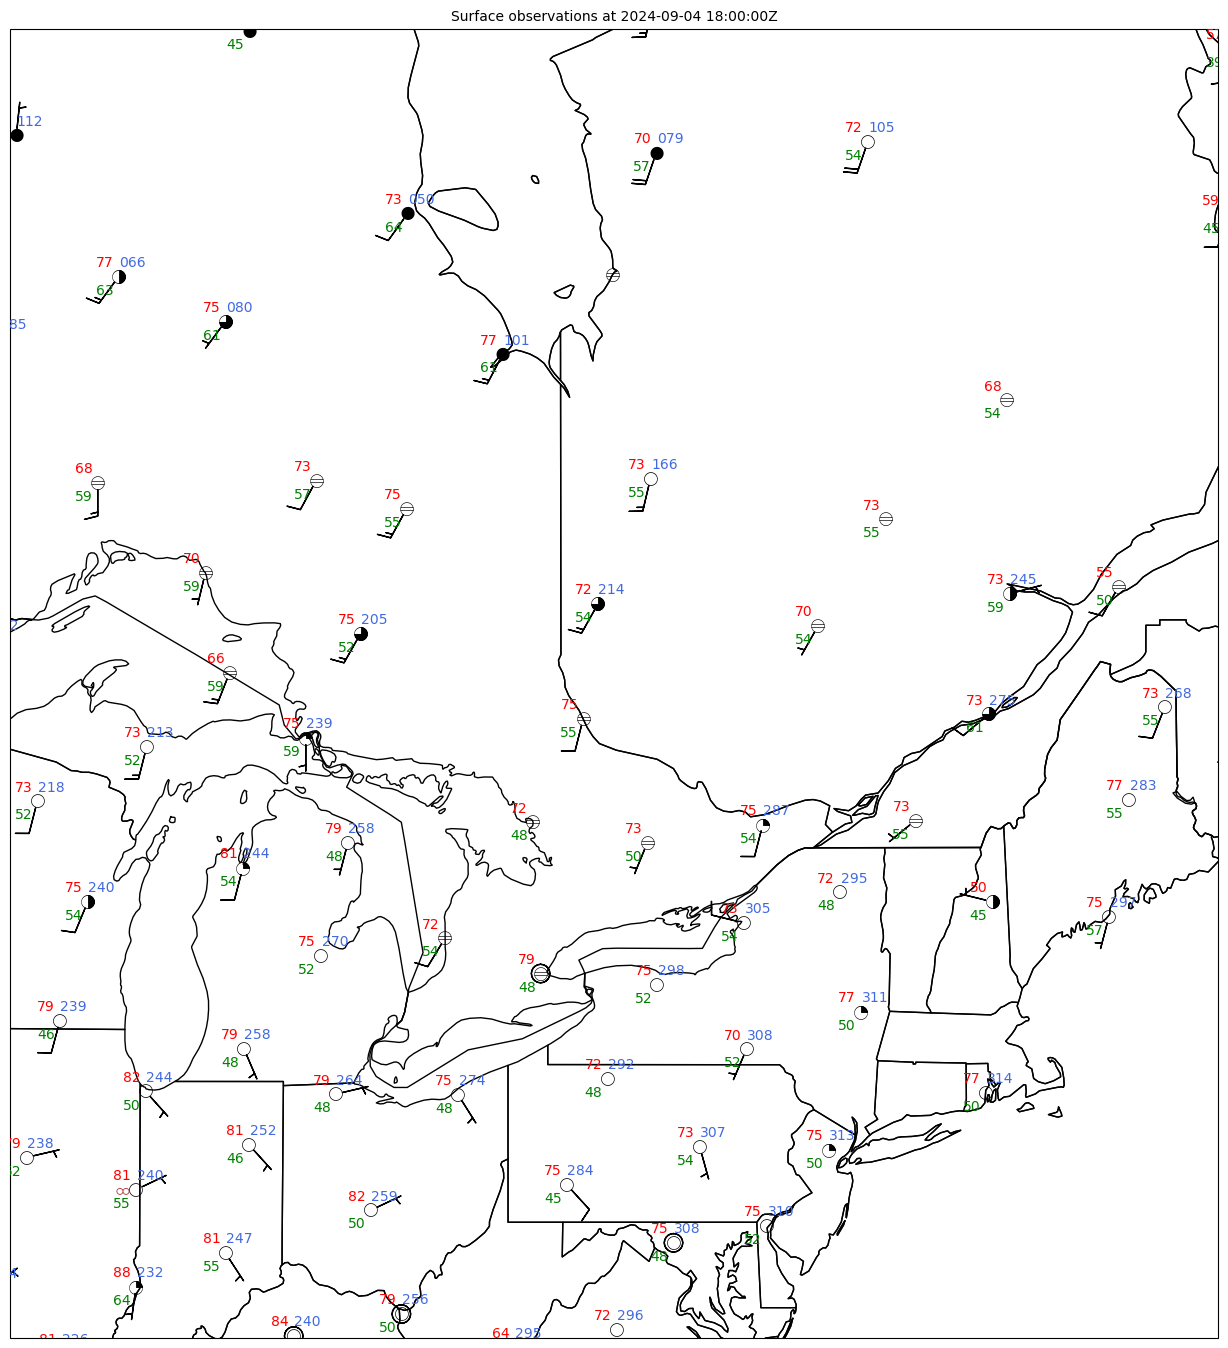

In [8]:
pc = PanelContainer()
# In general, use whatever size you want, but for printing, use (22, 17) or (17, 22)
pc.size = (22, 17)
pc.panels = [panel]

pc.show()

In [9]:
# Good settings for printing
pc.save('sfc_map.svg', bbox_inches='tight', dpi=300)